In [11]:
import os
import pandas as pd
import re

"""with open("dataset_forest_props_times_table.txt", "w") as file:
    pass"""

'with open("dataset_forest_props_times_table.txt", "w") as file:\n    pass'

In [12]:
list_names = ['adult', 'breast+cancer+wisconsin+diagnostic', 'car_evaluation', 'mushroom', 'nursery', 'seismic', 'spambase', 'wine', 'banknote+authentication', 'chess+king+rook+vs+king+pawn', 'monk1', 'monk2', 'monk3']

alias_dict = {
    'adult' : 'adult',
    'breast+cancer+wisconsin+diagnostic' : 'bcwd',
    'car_evaluation' : 'car_eval',
    'mushroom' : 'mushroom',
    'nursery' : 'nursery',
    'seismic' : 'seismic',
    'spambase' : 'spambase',
    'wine' : 'wine',
    'banknote+authentication' : 'banknote',
    'chess+king+rook+vs+king+pawn' : 'chess',
    'monk1' : 'monk1',
    'monk2' : 'monk2',
    'monk3' : 'monk3'
}

clean_dict = {
    'adult' : 'adult',
    'breast+cancer+wisconsin+diagnostic' : 'breast cancer wisconsin diagnostic',
    'car_evaluation' : 'car evalualtion',
    'mushroom' : 'mushroom',
    'nursery' : 'nursery',
    'seismic' : 'seismic',
    'spambase' : 'spambase',
    'wine' : 'wine',
    'banknote+authentication' : 'banknote',
    'chess+king+rook+vs+king+pawn' : 'king rook vs. king pawn',
    'monk1' : 'monk1',
    'monk2' : 'monk2',
    'monk3' : 'monk3'
}



# Create empty DataFrame with row indices as the names
df = pd.DataFrame(index=list_names)

# Add the three columns initialized with None
#df['datapoints'] = None
#df['bin_features'] = None
df['sklearn_rf_time'] = None
df['less_rf_time'] = None
df['lookahead_rf_time'] = None

print(df)




                                   sklearn_rf_time less_rf_time  \
adult                                         None         None   
breast+cancer+wisconsin+diagnostic            None         None   
car_evaluation                                None         None   
mushroom                                      None         None   
nursery                                       None         None   
seismic                                       None         None   
spambase                                      None         None   
wine                                          None         None   
banknote+authentication                       None         None   
chess+king+rook+vs+king+pawn                  None         None   
monk1                                         None         None   
monk2                                         None         None   
monk3                                         None         None   

                                   lookahead_rf_time  
adult 

In [13]:
# sklearn forest

#results/scikit_learn_forest/{dataset_name}/n_est{n_estimators}_depth{depth_tree}_2

for name in list_names:
    sum = 0
    for i in range(5): #folds
        sum_times = 0
        for run in range(5):
            with open(f'../results/scikit_learn_forest/{name}/n_est50_depth8_3/fold{i+1}/fold{i+1}_time_{name}_run{run+1}.txt', 'r') as file:
                last_line = file.readlines()[-1]
                match = re.search(r'\d+\.\d+', last_line)  # Finds the first floating-point number
                if match:
                    seconds = float(match.group())
                    #print(seconds)
                    sum_times += seconds
        sum_times = sum_times/5 # averaging run
        sum += sum_times
    sum = sum/5
    df.at[name, 'sklearn_rf_time'] = round(sum/60, 3)
    #minutes= round(mean/60, 2)
    #df.at[name, 'orig_rollOCT_time'] = minutes


print(df)
            

                                   sklearn_rf_time less_rf_time  \
adult                                        0.011         None   
breast+cancer+wisconsin+diagnostic           0.001         None   
car_evaluation                               0.001         None   
mushroom                                     0.002         None   
nursery                                      0.003         None   
seismic                                      0.001         None   
spambase                                     0.002         None   
wine                                         0.001         None   
banknote+authentication                      0.001         None   
chess+king+rook+vs+king+pawn                 0.001         None   
monk1                                        0.001         None   
monk2                                        0.001         None   
monk3                                        0.001         None   

                                   lookahead_rf_time  
adult 

In [14]:
#less rf
# results/less_random_forest_{dataset_name}/n_est{number_of_estimators}_depth{depth_rolling_tree}

for name in list_names:
    sum = 0
    for i in range(5): #folds
        sum_times = 0
        for run in range(5):
            with open(f'../results/less_random_forest_{name}/n_est50_depth8/fold{i+1}/fold{i+1}_time_{name}_run{run+1}.txt', 'r') as file:
                last_line = file.readlines()[-1]
                match = re.search(r'\d+\.\d+', last_line)  # Finds the first floating-point number
                if match:
                    seconds = float(match.group())
                    #print(seconds)
                    sum_times += seconds
        sum_times = sum_times/5 # averaging run
        sum += sum_times
    sum = sum/5
    df.at[name, 'less_rf_time'] = round(sum/60, 3)
    #minutes= round(mean/60, 2)
    #df.at[name, 'orig_rollOCT_time'] = minutes

print(df)

                                   sklearn_rf_time less_rf_time  \
adult                                        0.011      113.236   
breast+cancer+wisconsin+diagnostic           0.001        0.516   
car_evaluation                               0.001        0.217   
mushroom                                     0.002        5.965   
nursery                                      0.003        1.328   
seismic                                      0.001        0.535   
spambase                                     0.002        2.298   
wine                                         0.001        0.098   
banknote+authentication                      0.001        0.228   
chess+king+rook+vs+king+pawn                 0.001        0.479   
monk1                                        0.001        0.115   
monk2                                        0.001        0.158   
monk3                                        0.001        0.125   

                                   lookahead_rf_time  
adult 

In [15]:
#la_forest

# results/refactored_random_forest/{dataset_name}/n_est{number_of_estimators}_depth{depth_rolling_tree}


for name in list_names:
    sum = 0
    for i in range(5): #folds
        sum_times = 0
        for run in range(5):
            with open(f'../results/refactored_random_forest/{name}/n_est50_depth8_2/fold{i+1}/fold{i+1}_time_{name}_run{run+1}.txt', 'r') as file:
                last_line = file.readlines()[-1]
                match = re.search(r'\d+\.\d+', last_line)  # Finds the first floating-point number
                if match:
                    seconds = float(match.group())
                    #print(seconds)
                    sum_times += seconds
        sum_times = sum_times/5 # averaging run
        sum += sum_times
    sum = sum/5
    df.at[name, 'lookahead_rf_time'] = round(sum/60, 3)
    #minutes= round(mean/60, 2)
    #df.at[name, 'orig_rollOCT_time'] = minutes

print(df)

                                   sklearn_rf_time less_rf_time  \
adult                                        0.011      113.236   
breast+cancer+wisconsin+diagnostic           0.001        0.516   
car_evaluation                               0.001        0.217   
mushroom                                     0.002        5.965   
nursery                                      0.003        1.328   
seismic                                      0.001        0.535   
spambase                                     0.002        2.298   
wine                                         0.001        0.098   
banknote+authentication                      0.001        0.228   
chess+king+rook+vs+king+pawn                 0.001        0.479   
monk1                                        0.001        0.115   
monk2                                        0.001        0.158   
monk3                                        0.001        0.125   

                                   lookahead_rf_time  
adult 

In [16]:
"""#df['speedup_factor'] = df['old_time'] / df['new_time']

df['speedup_factor'] = df['orig_rollOCT_time'] / df['refac_rollOCT_time']
df['speedup_factor'] = df['speedup_factor'].astype(float)
df['speedup_factor'] = df['speedup_factor'].round(3)

print(df)"""

"#df['speedup_factor'] = df['old_time'] / df['new_time']\n\ndf['speedup_factor'] = df['orig_rollOCT_time'] / df['refac_rollOCT_time']\ndf['speedup_factor'] = df['speedup_factor'].astype(float)\ndf['speedup_factor'] = df['speedup_factor'].round(3)\n\nprint(df)"

In [17]:
print(df['less_rf_time'].sum())

125.298


In [18]:
#df.to_csv('data_easy_forest_times.txt', sep='&', index=True)

In [19]:
alias_dict = {
    'adult' : 'adult',
    'breast+cancer+wisconsin+diagnostic' : 'bcwd',
    'car_evaluation' : 'car_eval',
    'mushroom' : 'mushroom',
    'nursery' : 'nursery',
    'seismic' : 'seismic',
    'spambase' : 'spambase',
    'wine' : 'wine',
    'banknote+authentication' : 'banknote',
    'chess+king+rook+vs+king+pawn' : 'chess',
    'monk1' : 'monk1',
    'monk2' : 'monk2',
    'monk3' : 'monk3'
}

In [20]:
df_2 = df.copy()

#df_2 = df.drop(['speedup_factor'], axis=1)

# Reset index to turn row labels (datasets) into a column
df_2 = df_2.reset_index().rename(columns={'index': 'dataset'})


# Melt wide-format df to long-format for seaborn
df_long = df_2.melt(id_vars='dataset', var_name='method', value_name='runtime')

df_long['dataset'] = df_long['dataset'].map(alias_dict)

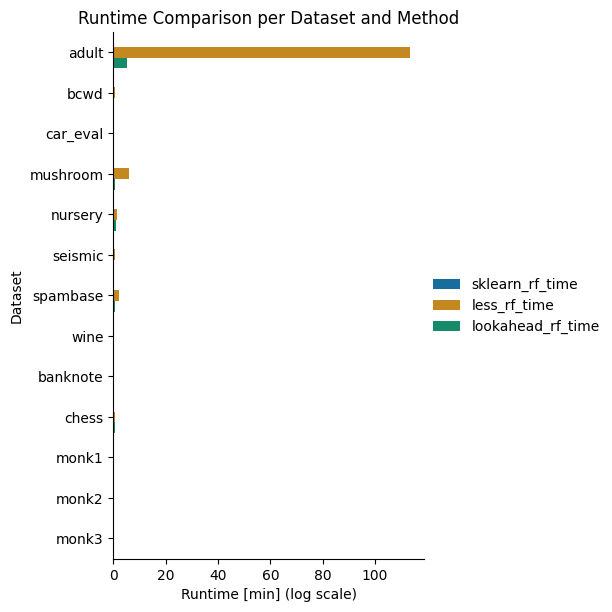

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    data=df_long,
    y='dataset',
    x='runtime',
    hue='method',
    kind='bar',
    height=6,
    aspect=0.8,
    palette='colorblind'
)
g.set(xscale='log')
g._legend.set_title('')  # remove legend title
plt.ylabel('Dataset')
plt.xlabel('Runtime [min] (log scale)')
plt.title('Runtime Comparison per Dataset and Method')
plt.savefig(os.path.join('../results', f'times_forest_log.svg'), format='svg', bbox_inches='tight')
plt.show()